Looking at the poly-A tails of human RNA

[FASTA file used](http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/mrna.fa.gz)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from itertools import groupby

def rna_adenylation(path):
    items = []
    for (header, seq) in fasta_iter(path):
        index = -1
        while(seq[index] == 'a'):
            index = index - 1
        a_tail_len = index * -1 - 1
        items.append((header, [len(seq), a_tail_len]))
    return pd.DataFrame.from_items(items, orient="index", columns=['rna_len', 'a_tail_len'])

# https://www.biostars.org/p/710/
def fasta_iter(fasta_name):
    """
    given a fasta file. yield tuples of header, sequence
    """
    fh = open(fasta_name)
    # ditch the boolean (x[0]) and just keep the header or sequence since
    # we know they alternate.
    faiter = (x[1] for x in groupby(fh, lambda line: line[0] == ">"))
    for header in faiter:
        # drop the ">"
        header = header.next()[1:].strip()
        # join all sequence lines to one.
        seq = "".join(s.strip() for s in faiter.next())
        yield header, seq

In [3]:
df = rna_adenylation("data/mrna.fa")
df.head(10)

,rna_len,a_tail_len
AF001540 1,1781,23
AF001541 1,1138,0
AF001542 1,2992,0
AF001543 1,903,0
AF001544 1,434,0
AF001545 1,370,38
AF001546 1,1142,0
AF001547 1,1092,0
AF034176 1,7232,1
AF038950 1,2384,30


In [4]:
df.describe()

,rna_len,a_tail_len
count,2.683747e+06,2.683747e+06
mean,2.054898e+02,1.215645e+00
std,6.991804e+02,5.291671e+00
min,2.000000e+00,0.000000e+00
25%,1.900000e+01,0.000000e+00
50%,1.900000e+01,0.000000e+00
75%,3.200000e+01,1.000000e+00
max,2.050120e+05,2.160000e+02


<IPython.core.display.Javascript object>


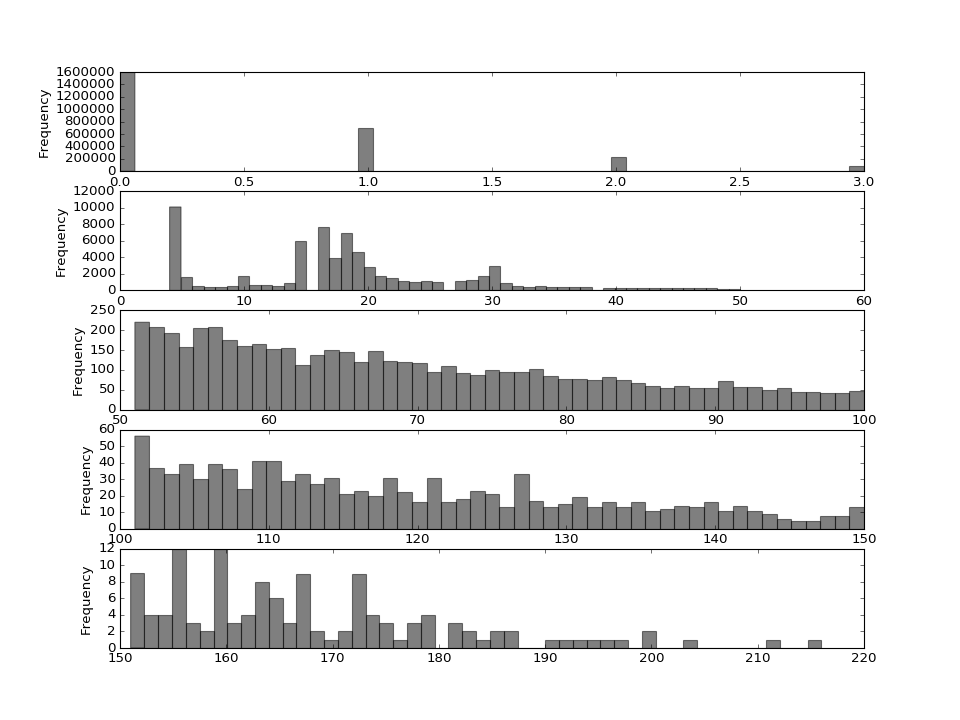

In [9]:
%matplotlib notebook

masks = [(df.a_tail_len <= 3),
         (df.a_tail_len > 3) & (df.a_tail_len <= 50),
         (df.a_tail_len > 50) & (df.a_tail_len <= 100),
         (df.a_tail_len > 100) & (df.a_tail_len <= 150),
         (df.a_tail_len > 150)]

plt.figure(figsize=(12,9))
for idx, mask in enumerate(masks):
    plt.subplot(len(masks), 1, idx+1)
    df[mask]["a_tail_len"].plot.hist(bins=50, alpha=0.5, color='k')
plt.show()

Most of the RNA didn't have poly-A tails

In [6]:
df[(df.a_tail_len == 0)].describe()

,rna_len,a_tail_len
count,1.592318e+06,1592318.0
mean,1.944552e+02,0.0
std,6.548029e+02,0.0
min,2.000000e+00,0.0
25%,1.900000e+01,0.0
50%,1.900000e+01,0.0
75%,3.200000e+01,0.0
max,7.447400e+04,0.0


<IPython.core.display.Javascript object>


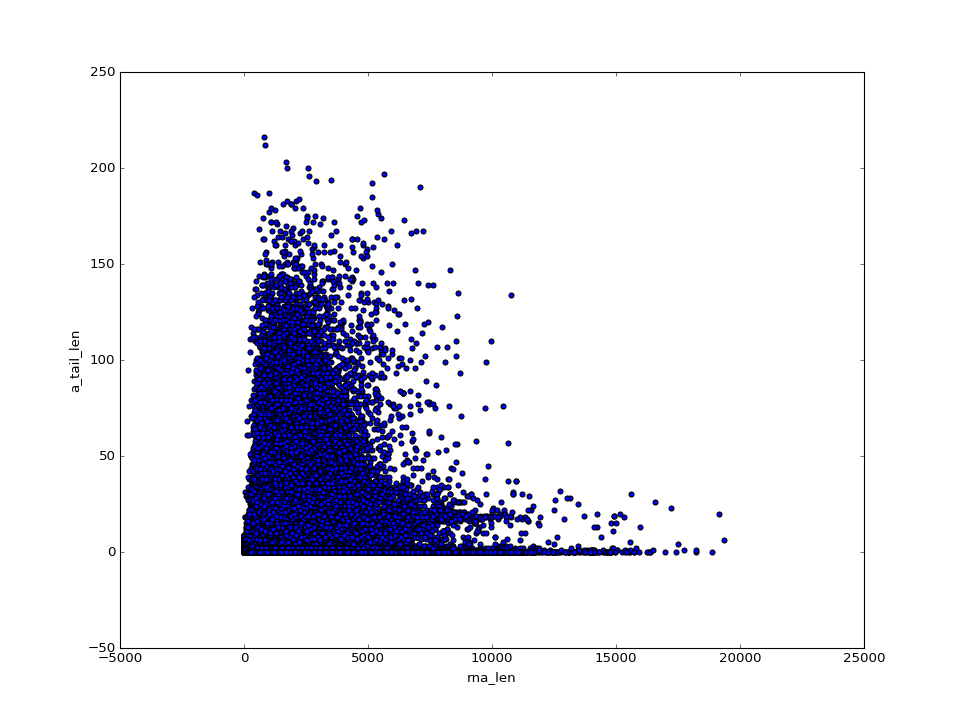

In [7]:
%matplotlib notebook
# Remove a few outliers and put them into a table instead
df[(df.rna_len < 20000)].plot.scatter(x='rna_len', y='a_tail_len', figsize=(12,9))
plt.show()

In [8]:
# The outliers
df[(df.rna_len >= 20000)]

,rna_len,a_tail_len
HW531608 1,26993,0
CS329402 1,49020,0
JB406675 1,28803,0
JB406694 1,74474,0
JB406696 1,39731,2
FW339979 1,20881,12
AB537889 1,21055,7
AF357236 1,20478,1
AF361486 3,21112,37
AF414442 2,66765,15
